In [201]:
# Import required library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import f1_score

# scipy libraries
from scipy import stats

In [3]:
# Load in csv with labels
file_path = "data/train.csv"
df = pd.read_csv(file_path, usecols=[1,2], header=0, names=["uid", "class"])

print(df)

           uid  class
0    ZYURRE527      4
1    ZWNWBP435      0
2    ZVHEZA963      4
3    ZSFNU1100      4
4    ZRXUB1049      0
..         ...    ...
422  AGHXWX765      0
423  AFEOPC672      3
424  AEEEIG737      3
425  ADQRPH513      3
426  ABNTSS552      4

[427 rows x 2 columns]


### Data Exploration Section

In [4]:
# Explore class distribution
class_dist = df["class"].value_counts()
print(class_dist)

# Calculate class frequencies
class_freq = (np.bincount(df["class"])) / len(df) * 100
print(class_freq)

0    159
4    109
3     78
1     54
2     27
Name: class, dtype: int64
[37.23653396 12.64637002  6.32318501 18.26697892 25.52693208]


In [5]:
def get_features(uid):
    # Set file path using uid
    file_path = f"data/img_details/{uid}.csv"
    
    # Open csv
    csv_df = pd.read_csv(file_path, header=None)

    # Return as a Python list
    return csv_df.iloc[0].values.tolist()

In [6]:
# Get img features in a single df
features = df[["uid"]].apply(lambda row: get_features(row[0]), axis=1, result_type="expand")

In [50]:
# Get number of cols
num_features = len(features.columns)

# Set column names (features): f0000, f0001, f0002, ... f1024
col_names = [f"f{index:04d}" for index in range(num_features)]

# Rename columns to identify features
features.columns=col_names

# Create final df with all img features
features_df = pd.concat([df, features], axis=1)
features_df.to_csv("all_features.csv")

display(features_df)

,uid,class,f0000,f0001,f0002,f0003,f0004,f0005,f0006,f0007,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,ZYURRE527,4,0.000462,0.005583,-0.001031,0.002307,-0.113097,-0.284965,0.001069,-0.000092,...,0.680631,-1.153061,0.111816,0.162622,-1.085265,-0.657002,-1.406191,2.240085,0.118616,-0.728013
1,ZWNWBP435,0,0.000220,0.006780,-0.000547,0.002183,-0.045820,-0.216762,0.000987,-0.001331,...,-1.241972,-0.115316,-0.411191,0.431461,0.442649,1.243681,-0.151721,0.458508,1.931918,-0.241081
2,ZVHEZA963,4,0.000405,0.007183,-0.000137,0.002612,-0.083430,-0.292385,0.001094,-0.000112,...,0.659314,-0.792833,-0.471358,0.514799,-0.846220,0.479314,-0.730218,1.352716,0.040223,-0.163302
3,ZSFNU1100,4,0.000388,0.003802,0.002121,0.001513,-0.109248,-0.183284,0.000813,-0.001447,...,-0.047666,-0.201043,-0.565545,0.999009,-0.332314,-0.066972,-1.263785,3.876905,-0.397950,-0.693763
4,ZRXUB1049,0,0.000425,0.006544,0.001630,0.001549,-0.068301,-0.283487,0.001004,-0.001800,...,-1.221178,-0.253239,-0.046740,0.242367,-0.379724,-0.893249,-0.957397,1.118245,0.181925,-0.024197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,AGHXWX765,0,0.000305,0.003671,-0.004093,0.003010,-0.093583,0.133018,0.000627,0.001443,...,-0.260746,-0.741712,-0.887129,0.190525,0.216271,0.490549,-1.047399,1.875185,0.345561,-0.874318
423,AFEOPC672,3,0.000441,0.006178,-0.000811,0.003572,-0.108863,-0.302020,0.000761,0.001851,...,0.457373,-0.782917,-1.072765,1.180279,-0.111142,1.897755,-0.902370,0.552967,-0.314270,-1.198762
424,AEEEIG737,3,0.000464,0.006611,0.000842,0.001412,-0.152744,-0.355706,0.000906,-0.001229,...,0.411773,0.232481,-0.527885,-0.305296,-0.189008,-0.592684,-1.144780,3.459698,-0.199579,-0.999165
425,ADQRPH513,3,0.000233,0.003029,0.001606,0.001224,-0.092386,-0.434045,0.000668,-0.000410,...,-0.147889,1.168724,-0.486698,1.134707,-0.029372,0.092189,-0.791921,1.786787,2.089036,-0.690614


- Use interpretability / feature importance packages from Azure machine learning
- Use linear discriminant analysis to convert multi-dimensional feature space into 2d
- Plot boxplots

In [8]:
# Make box plots
def make_boxplots(feature_name, output_folder="plots/boxplot"):
    # Create plot
    plt.boxplot([
        features_df[feature_name].loc[features_df["class"]==0], 
        features_df[feature_name].loc[features_df["class"]==1],
        features_df[feature_name].loc[features_df["class"]==2], 
        features_df[feature_name].loc[features_df["class"]==3],
        features_df[feature_name].loc[features_df["class"]==4]
        ])
    plt.title(feature_name)
    plt.xlabel("Class")
    plt.ylabel("Feature Value")

    # Save figure
    plt.savefig(f"{output_folder}/{feature_name}.png")
    plt.close()

In [9]:
# Loop over each feature and create boxplot
for feature in col_names:
    make_boxplots(feature)

### Train/Test Split Section

Try different ways of splitting the data

1. 70/30 train/test
2. 70/30 train/test stratified
3. 80/20 train/test
4. 80/20 train/test stratified
5. k-fold cross-validation, k=5
6. k-fold cross-validation, k=8
7. k-fold cross-validation, k=10
8. k-fold cross-validation, k=12

Last 4 approaches to be implemented in testing section.

In [195]:
# 1. 70/30 train/test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    features_df[col_names], 
    features_df["class"],
    test_size=0.30, random_state=10
)

# Get number of samples from each class in train and test subsets
train_count1 = y_train1.value_counts()
print(f"Training subset:\n{train_count1}")

test_count1 = y_test1.value_counts()
print(f"Testing subset:\n{test_count1}")

Training subset:
0    121
4     71
3     52
1     36
2     18
Name: class, dtype: int64
Testing subset:
4    38
0    38
3    26
1    18
2     9
Name: class, dtype: int64


In [196]:
# 2. 70/30 train/test stratified split
# Use sklearn train_test_split function
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    features_df[col_names], 
    features_df["class"],
    test_size=0.30, random_state=10, stratify=features_df["class"]
)

# Get number of samples from each class in train and test subsets
train_count2 = y_train2.value_counts()
print(f"Training subset:\n{train_count2}")

test_count2 = y_test2.value_counts()
print(f"Testing subset:\n{test_count2}")

Training subset:
0    111
4     76
3     54
1     38
2     19
Name: class, dtype: int64
Testing subset:
0    48
4    33
3    24
1    16
2     8
Name: class, dtype: int64


In [198]:
# 3. 80/20 train/test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    features_df[col_names], 
    features_df["class"],
    test_size=0.20, random_state=10
)

# Get number of samples from each class in train and test subsets
train_count3 = y_train3.value_counts()
print(f"Training subset:\n{train_count1}")

test_count3 = y_test1.value_counts()
print(f"Testing subset:\n{test_count3}")

Training subset:
0    121
4     71
3     52
1     36
2     18
Name: class, dtype: int64
Testing subset:
4    38
0    38
3    26
1    18
2     9
Name: class, dtype: int64


In [199]:
# 4. 80/20 stratified split
# Use sklearn train_test_split function
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    features_df[col_names], 
    features_df["class"],
    test_size=0.30, random_state=10, stratify=features_df["class"]
)

# Get number of samples from each class in train and test subsets
train_count4 = y_train4.value_counts()
print(f"Training subset:\n{train_count4}")

test_count4 = y_test4.value_counts()
print(f"Testing subset:\n{test_count4}")

Training subset:
0    111
4     76
3     54
1     38
2     19
Name: class, dtype: int64
Testing subset:
0    48
4    33
3    24
1    16
2     8
Name: class, dtype: int64


### Feature Selection Section

1. Try linear discriminant analysis to reduce dimensionality of problem

2. Try using the K-mean clustering techniques (partitional clustering, no overlap between groups)    
    Source: https://realpython.com/k-means-clustering-python/

3. Look at correlation between features and understand if we can use it to identify useful features. If two features are highly correlated, we aren't gaining any new information - can remove one.

In [220]:
# Linear Discriminant Analysis to reduce dimensionality of problem
lda_clf = LinearDiscriminantAnalysis()
lda_model = lda_clf.fit(features_df[col_names], features_df["class"])
lda_transform = lda_model.transform(features_df[col_names])

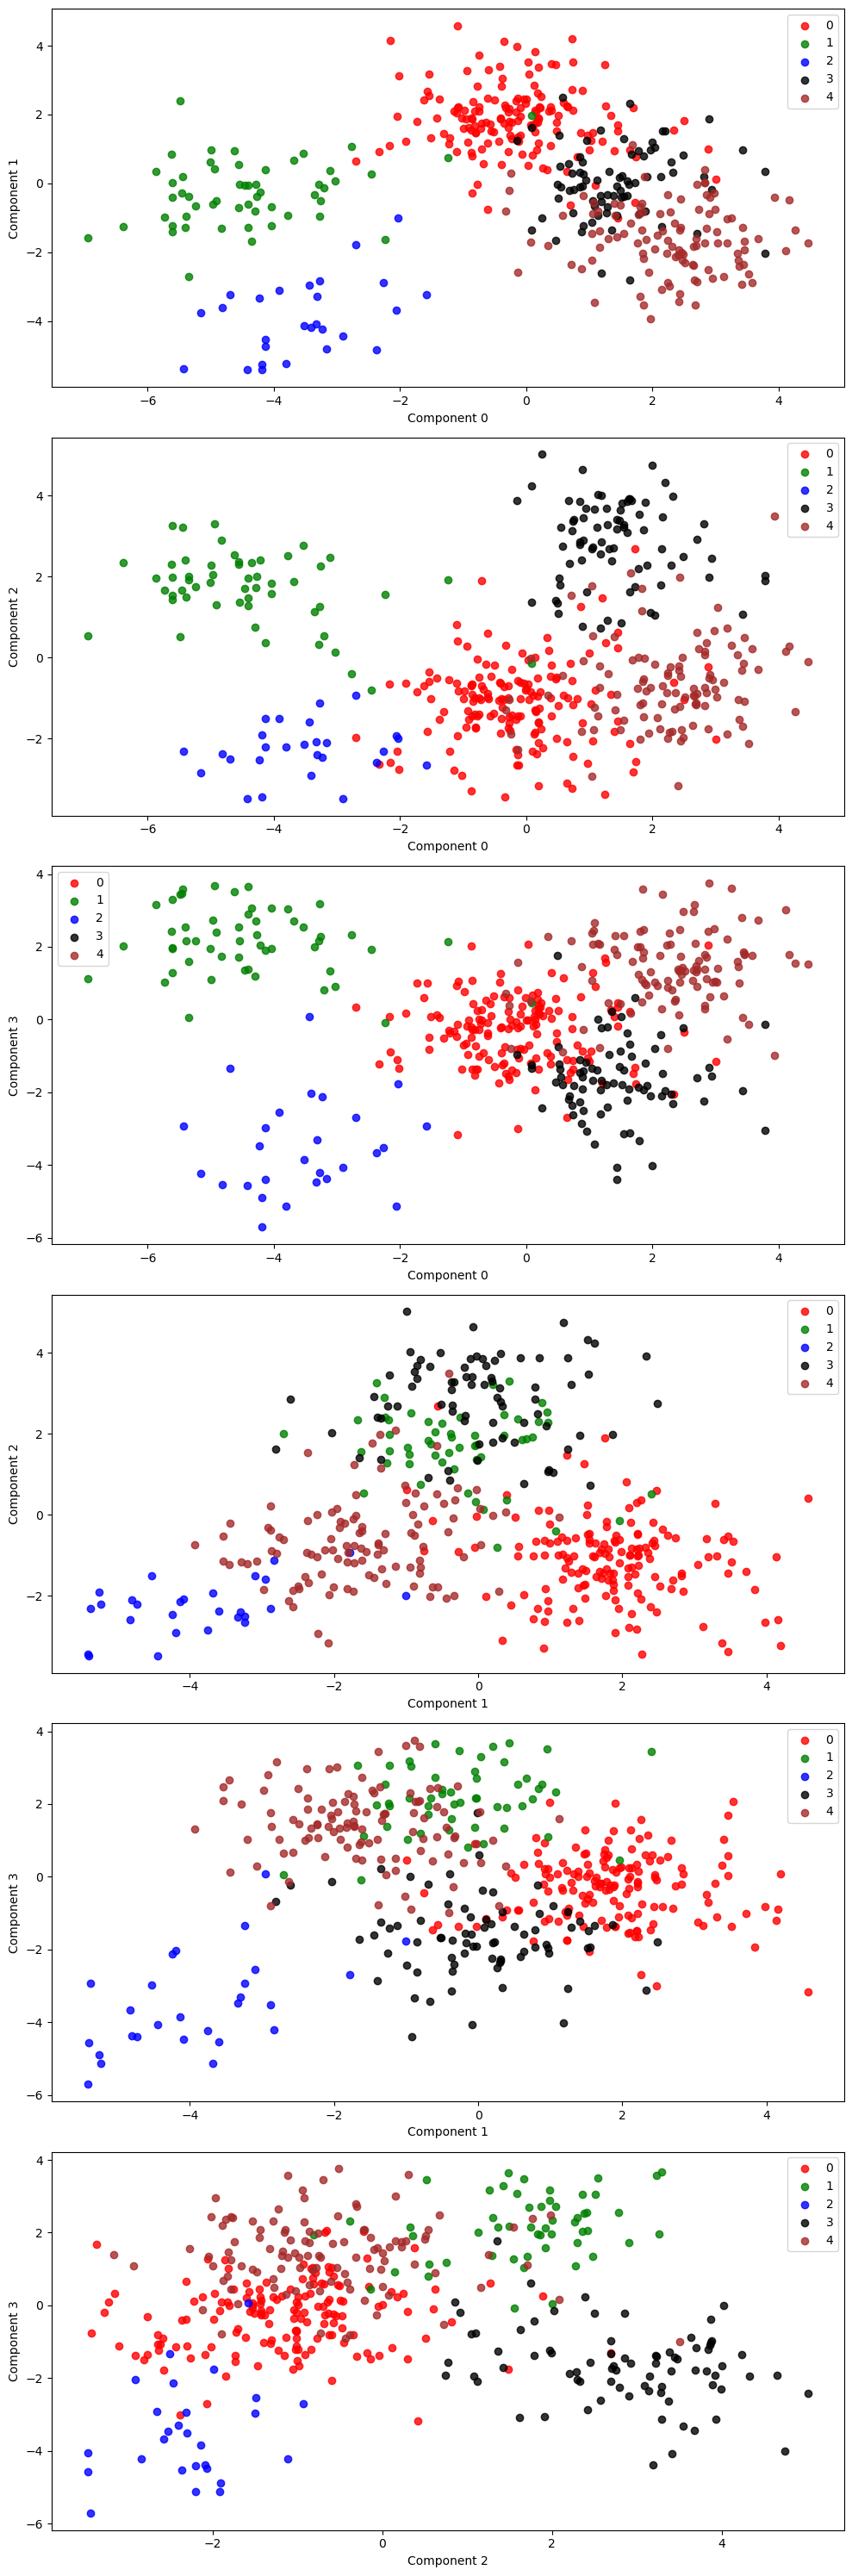

In [222]:
# Visualize LDA results
target_class = np.unique(features_df["class"])
colors = ["red", "green", "blue", "black", "brown"]
# Get number of components
n_components = lda_transform.shape[1]
pairs = []
for xi in range(n_components):
    for yi in range(n_components):
        if yi > xi:
            pairs.append((xi,yi))

# Setup subplots
fig, ax = plt.subplots(len(pairs), 1, figsize=(10,30))

# Get every combination of LDA components
# Setting up all values to plot
for ax_i,(xi,yi) in enumerate(pairs):
    # Plot data
    for color, i, c in zip(colors, [0,1,2,3,4], target_class):
        ax[ax_i].scatter(lda_transform[features_df["class"] == i, xi],
            lda_transform[features_df["class"] == i, yi],
            alpha=.8, color=color, label=c)
    # Add legend
    ax[ax_i].set_xlabel(f"Component {xi}")
    ax[ax_i].set_ylabel(f"Component {yi}")
    ax[ax_i].legend(loc="best")

# Set title on the plot
#plt.title("Linear Discriminant Analysis")
plt.tight_layout()

Component 0 and 2 are the most separable/useful result.

In [83]:
# K-MEANS
#  K-means clustering set up
n_clusters = 15
n_init = 15
random_state = 100

# Implement kmeans
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state).fit(features_df[col_names])
kmeans_transform = kmeans.transform(features_df[col_names])
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


{0: 30, 1: 46, 2: 36, 3: 28, 4: 26, 5: 38, 6: 33, 7: 38, 8: 25, 9: 11, 10: 16, 11: 22, 12: 30, 13: 32, 14: 16}


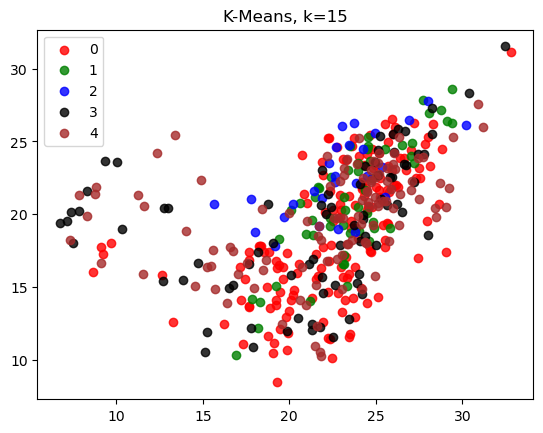

In [84]:
# Visualize Kmeans results
target_class = np.unique(features_df["class"])
colors = ["red", "green", "blue", "black", "brown"]

for color, i, target_class in zip(colors, [0,1,2,3,4], target_class):
    plt.scatter(kmeans_transform[features_df["class"] == i, 0],
        kmeans_transform[features_df["class"] == i, 1],
        alpha=.8, color=color, label=target_class)

# Add legend
plt.title("K-Means, k=15")
plt.legend(loc="best")
plt.show()

In [165]:
# CORRELATION BETWEEN FEATURES
n_features=1024
subset_colindex = np.arange(n_features)

# Initialize array that will be used to store feature correlations
correl_array = np.zeros((n_features, n_features))

for i0,i1 in itertools.combinations(subset_colindex,2):
    f0 = col_names[i0]
    f1 = col_names[i1]
    # Compute correlation
    correl = stats.spearmanr(features_df[f0], features_df[f1])
    # Build matrix
    correl_array[i0, i1] = correl[0]
    correl_array[i1, i0] = correl[0]

# Get least correlated feature
correl_array = np.abs(correl_array)
net_correl = np.sum(correl_array, axis=1)
min_correl = np.argsort(net_correl)
print(min_correl[:20])



[677 942 828 750 983 981 785 649 819 946 731 755 833 722 615 870 574 834
 777 865]


In [167]:
# Export correlation array to csv
np.savetxt("outputs/feature_correl.csv", correl_array, delimiter=",")

### Evaluating Model Performance Section

1. Train and evaluate on 70/30 train/test split with and without preprocessing steps
2. Train and evaluate on 70/30 stratified train/test split with and without preprocessing steps


In [210]:
# 1a) 70/30 train/test split, no preprocessing
# Create linear SVM classifier
svm_clf = SVC(kernel="linear", C=1)

# Train the SVM model using the clf
svm1 = svm_clf.fit(X_train1, y_train1)

# Calculate f1 score
y_pred1 = svm1.predict(X_test1)
f1_score1 = f1_score(y_test1, y_pred1, average='weighted')
print(f"F1 score after 70/30 split, no processing, is: {f1_score1:.3f}")

Accuracy for linear SVM is: 0.414


In [216]:
# 1b) 70/30 train/test split, after correlation preprocessing
subset_names = [col_names[i] for i in min_correl[:20]]
svm2 = svm_clf.fit(features_df[subset_names], features_df["class"])

# Calculate accuracy
y_pred2 = svm2.predict(X_test1[subset_names])
f1_score2 = f1_score(y_test1, y_pred2, average='weighted')
print(f"F1 score for 70/30 split after correlation preprocessing is: {f1_score2:.3f}")


F1 score for 70/30 split after correlation preprocessing is: 0.319


In [225]:
#5. Try training classifier with cross-fold validation
# Use cross_validate from sklearn to obtain accuracies for 5-fold cross validation
cv_results = cross_validate(svm_clf, features_df[col_names], features_df["class"], cv=5,
    scoring='f1_weighted')

# Print accuracy for each fold
for i in range(0,5):
    print(f"The accuracy for fold {i} is: {cv_results['test_score'][i]:.3f}")

# Print average accuracy across all five folds
svm_avg = np.average(cv_results['test_score'])
print(f"The averge accuracy across all five folds is: {svm_avg:.3f}")

# Print standard deviation across five accuracy measurements
svm_std = np.std(cv_results['test_score'])
print(f"The standard deviation across the five accuracy measurements is: {svm_std:.3f}")

The accuracy for fold 0 is: 0.456
The accuracy for fold 1 is: 0.464
The accuracy for fold 2 is: 0.401
The accuracy for fold 3 is: 0.495
The accuracy for fold 4 is: 0.472
The averge accuracy across all five folds is: 0.458
The standard deviation across the five accuracy measurements is: 0.031
